In [93]:
#import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [136]:
points = {}
points['Br'] = [393,-496]
points['Tr'] = [398,-685]
points['b'] = [353,-686]
points['t'] = [350,-575]
points['r1'] = [390,-644]
points['r2'] = [567,-641]
points['P'] = [4961/2,-158807/2]
points['Q'] = [114797/14,-7163/14]
points['I'] = [347.862,-495.897]

In [130]:
x = range(1281)
deg = 1
coeffs = np.polyfit([points['Br'][0],points['Tr'][0]],[points['Br'][1],points['Tr'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line4 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['b'][0],points['t'][0]],[points['b'][1],points['t'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line3 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['r1'][0],points['r2'][0]],[points['r1'][1],points['r2'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line2 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['Tr'][0],points['b'][0]],[points['Tr'][1],points['b'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line1 = coeffs[0]*x + coeffs[1]
#----
coeffs = np.polyfit([points['Q'][0],points['Br'][0]],[points['Q'][1],points['Br'][1]],deg)
polynomial = np.poly1d(coeffs)
#print(coeffs)
print(polynomial)
line5 = coeffs[0]*x + coeffs[1]

 
-37.8 x + 1.436e+04
 
-37 x + 1.237e+04
 
0.01695 x - 650.6
 
0.02222 x - 693.8
 
-0.002004 x - 495.2


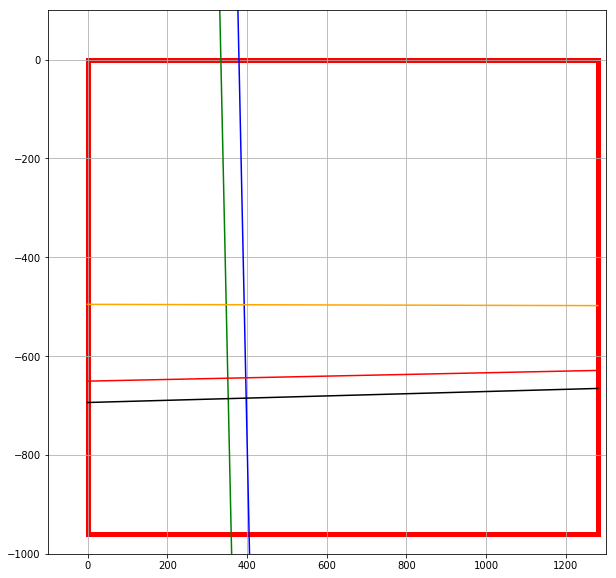

In [131]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.axis((-100,1300,-1000,100))
rect = patches.Rectangle((0,-960),1280,960,linewidth=5,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.grid('on')
plt.plot(line3,'g')
plt.plot(line4,'b')
plt.plot(line2,'r')
plt.plot(line1,'black')
plt.plot(line5,'orange')
plt.show()

In [134]:
def euclid(a,b):
    return( math.sqrt( (abs(a[0]-b[0]))**2 + (abs(a[1]-b[1]))**2))

In [153]:
#print(euclid([0,0],[3,4]))
IB = euclid(points['I'],points['b'])
IP = euclid(points['I'],points['P'])
TB = euclid(points['t'],points['b'])
TP = euclid(points['t'],points['P'])
print(IB)
print(IP)
print(TB)
print(TP)

# print(euclid(points['I'],points['t']))
# print(euclid(points['t'],points['b']))
# print(euclid(points['b'],points['P']))
# print('second:')
# print(euclid([0,0],[3,4]))

Cross1 = (IB/IP)/(TB/TP)
print("CrossRatio:",Cross1)

190.17242085276195
78936.41717258678
111.04053313993049
78857.28528487397
CrossRatio: 1.710922778692296


In [157]:
BrTr = euclid(points['Br'],points['Tr'])
print(BrTr)
BrP = euclid(points['Br'],points['P'])
print(BrP)
TrP = euclid(points['Tr'],points['P'])
first = BrTr/BrP
print(first)

189.06612599828665
78935.10760428467
0.0023952095808383238


In [158]:
second = first / Cross1
print(second)

0.00139995189184929


In [160]:
third = second*TrP
print(third)

110.24066974316968


In [161]:
final = 1 - second
print(final)

0.9986000481081507


In [162]:
# TOTAL PIXEL EQ HEIGHT OF PHYSICAL NET DIMENSONAL HEIGHT
h = third/final
print(h)

110.39521773709183


In [164]:
PoleInches = 71
NetDimHeight = PoleInches * h / BrTr
print("Final Net Dimensional Height (inches):", NetDimHeight)

Final Net Dimensional Height (inches): 41.456714776101926


In [168]:
ActualNetDimHeight = 39 # could check with volleyball
print("Error: ",(NetDimHeight - ActualNetDimHeight)/ActualNetDimHeight*100, "%")

Error:  6.299268656671604 %


In [3]:
img = cv2.imread('/home/scott/VB-Research/Jupyter/Images/OpenCVtest.png',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

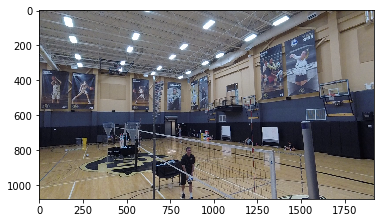

In [4]:
plt.imshow(img)

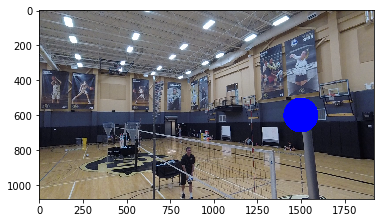

In [5]:
cv2.circle(img, (1500,600), 100, (0,0,255), -1);
plt.imshow(img)

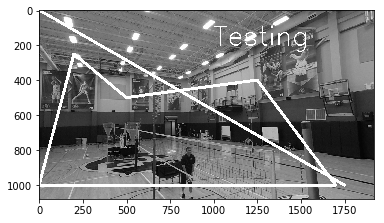

In [19]:
im2 = cv2.imread('/home/scott/VB-Research/Jupyter/Images/OpenCVtest.png',cv2.IMREAD_GRAYSCALE)
# plt.imshow(im2,cmap='gray',interpolation='bicubic')

# to save an image: cv2.imwrite('filename.png',im2)

cv2.line(im2, (0,0),(1750,1000),(255,255,255),15)

# for a polygon:
points = np.array([[200,250],[500,500],[1250,400],[1700,1000],[0,1000]],np.int32)
points = points.reshape((-1,1,2))
cv2.polylines(im2, [points], True, (255,255,0), 15)

# for words:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im2, 'Testing', (1000,200), font, 5, (255, 255, 255),5, cv2.LINE_AA)

plt.imshow(im2,cmap='gray')

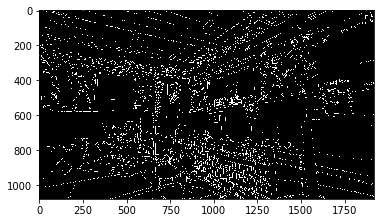

In [47]:
im3 = cv2.imread('/home/scott/VB-Research/Jupyter/Images/OpenCVtest.png',1)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

laplacian = cv2.Laplacian(im3,cv2.CV_64F)
sobelx = cv2.Sobel(im3,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(im3,cv2.CV_64F,0,1,ksize=5)

# for edges: super important
edge = cv2.Canny(im3, 100, 200)

# plt.imshow(laplacian) 
plt.imshow(edge,cmap='gray')
# plt.imshow(sobelx) 

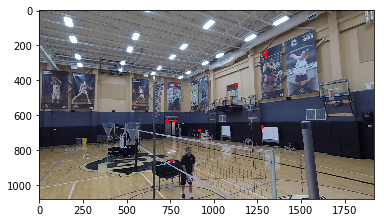

In [48]:
gray = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 10, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(im3, (x,y), 10, 255, -1)

plt.imshow(im3)